In [1]:
import torch
import numpy as np
from model import Model
from ploter import Ploter
from backup_manager import BackupManager

In [2]:
model, device = BackupManager.load_model("models/model1.pkl")

Model loaded from models/model1.pkl


In [3]:
print(model.posterior)
print(model.normalizer)
print(model.simulator)
print(model.prior)
print(model.neural_network)

Posterior p(θ|x) of type MCMCPosterior. It provides MCMC to .sample() from the posterior and can evaluate the _unnormalized_ posterior density with .log_prob().
BoxUniform(Uniform(low: tensor([3.]), high: tensor([5.])), 1)


Simulating samples:   0%|          | 0/1 [00:00<?, ?it/s]

/home/hep/nrc25/miniconda3/envs/mlhep/lib/python3.12/site-packages/eos/signal_pdf.py:71: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  log_proposal = pypmc.density.gauss.LocalGauss(sigma)


Pre-runs:   0%|          | 0/2 [00:00<?, ?it/s]

Main run:   0%|          | 0/100 [00:00<?, ?it/s]

True parameter tensor([4.0498])
Observed data tensor([ 0.0005, -0.0276,  0.1204, -0.0896, -0.0847]) tensor([0.9896, 1.0192, 0.9827, 0.9771, 1.0154])


Generating 20 MCMC inits via resample strategy:   0%|          | 0/20 [00:00<?, ?it/s]

Running vectorized MCMC with 20 chains:   0%|          | 0/6000 [00:00<?, ?it/s]

Predicted parameter mean tensor(3.9822)


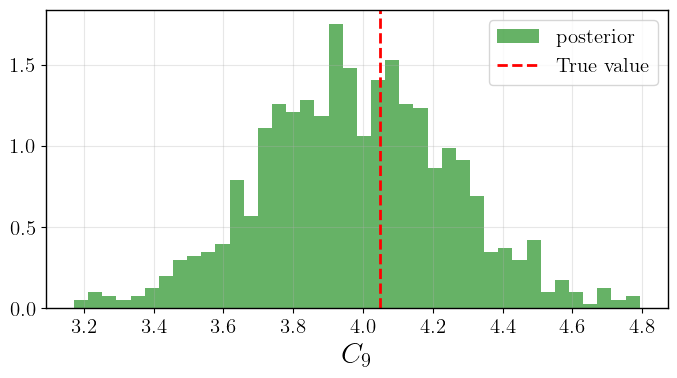

In [4]:
n_points = 1000
true_parameter, observed_sample = model.get_random_true_parameter(n_points)
print("True parameter", true_parameter)
print("Observed data", observed_sample.mean(dim=(0)), observed_sample.std(dim=0))
n_sampled_parameters = 1000
sampled_parameters = model.draw_parameters_from_predicted_posterior(observed_sample, n_sampled_parameters)
print("Predicted parameter mean", sampled_parameters.mean())
Ploter.plot_a_posterior(sampled_parameters, true_parameter)

Generating 20 MCMC inits via resample strategy:   0%|          | 0/20 [00:00<?, ?it/s]

Running vectorized MCMC with 20 chains:   0%|          | 0/5020 [00:00<?, ?it/s]

Simulating samples:   0%|          | 0/5 [00:00<?, ?it/s]

Pre-runs:   0%|          | 0/2 [00:00<?, ?it/s]

Main run:   0%|          | 0/100 [00:00<?, ?it/s]

Pre-runs:   0%|          | 0/2 [00:00<?, ?it/s]

Main run:   0%|          | 0/100 [00:00<?, ?it/s]

Pre-runs:   0%|          | 0/2 [00:00<?, ?it/s]

Main run:   0%|          | 0/100 [00:00<?, ?it/s]

Pre-runs:   0%|          | 0/2 [00:00<?, ?it/s]

Main run:   0%|          | 0/100 [00:00<?, ?it/s]

Pre-runs:   0%|          | 0/2 [00:00<?, ?it/s]

Main run:   0%|          | 0/100 [00:00<?, ?it/s]

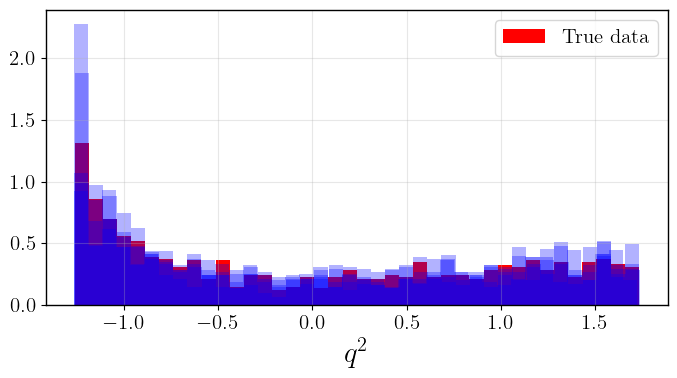

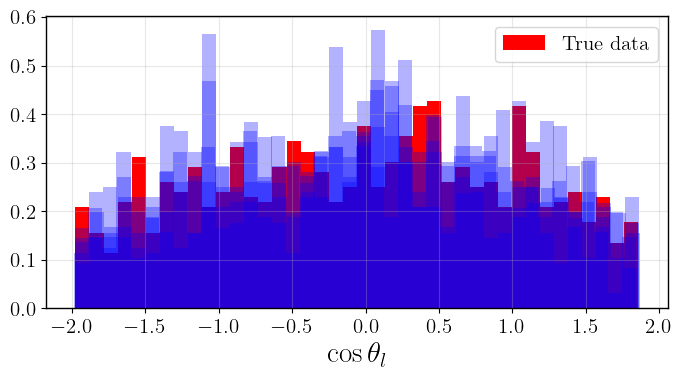

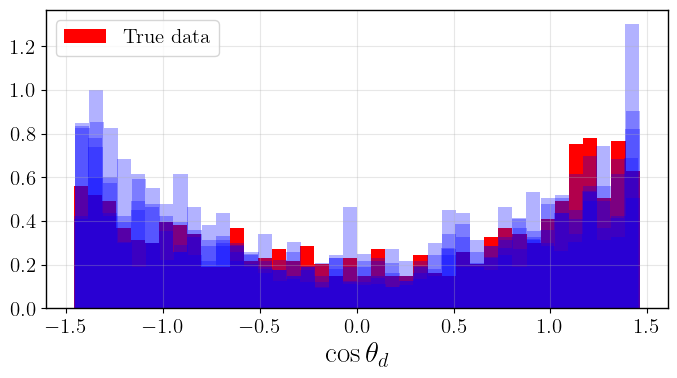

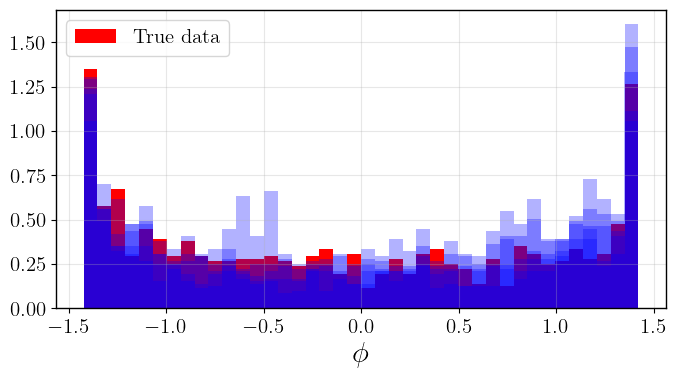

In [5]:
n_similar = 5
Ploter.plot_similar_data(model, observed_sample, n_similar, n_points)